**Анализ бурёнок**

# Цель исследования

1. Спрогнозировать удой коровы;
2. Спрогнозировать вкус молока.

# Загрузка и обзор данных

## Считаем CSV-файлы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats as st
from scipy.stats import t, spearmanr
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score, 
    recall_score, 
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix, 
    ConfusionMatrixDisplay
)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# вывод всех столбцов и строк, независимо от их количества.
pd.set_option('display.max_columns', None)

# отключаем предупреждение
pd.options.mode.chained_assignment = None

In [3]:
try:
    ferma_main = pd.read_csv(
        r'...\ferma_main.csv')
    ferma_dad = pd.read_csv(
        r'...\ferma_dad.csv')
    cow_buy = pd.read_csv(
        r'...\cow_buy.csv')
except:
    ferma_main = pd.read_csv('.../ferma_main.csv')
    ferma_dad = pd.read_csv('.../ferma_dad.csv')
    cow_buy = pd.read_csv('.../cow_buy.csv')

## Выведем первые строки каждого набора данных

In [4]:
print('Данные по ferma_main')
display(ferma_main.head())
print('Данные по ferma_dad')
display(ferma_dad.head())
print('Данные по cow_buy')
display(cow_buy.head())

Данные по ferma_main


,id;Удой,кг;ЭКЕ (Энергетическая кормовая единица);Сырой протеин,г;СПО (Сахаро-протеиновое соотношение);Порода;Тип пастбища;порода папы_быка;Жирность,%;Белок,%;Вкус молока;Возраст
0,1;5863;14,2;1743;0,89;Вис Бик Айдиал;Равнинное;Айдиал;3,58;3,076;вкусно;более_2_лет
1,2;5529;12,8;2138;0,89;Вис Бик Айдиал;Равнинные;Соверин;3,54;3,079;вкусно;менее_2_лет
2,3;5810;14;1854;0,885;РефлешнСоверинг;Холмистое;Соверин;3,59;3,074;не вкусно;более_2_лет,NaN
3,4;5895;12,4;2012;0,885;РефлешнСоверинг;Холмистое;Айдиал;3,4;3,075;не вкусно;более_2_лет
4,5;5302;12,8;1675;0,885;Вис Бик Айдиал;Равнинные;Соверин;3,73;3,073;вкусно;менее_2_лет


Данные по ferma_dad


,id;Имя Папы
0,1;Буйный
1,2;Соловчик
2,3;Барин
3,4;Буйный
4,5;Барин


Данные по cow_buy


,Порода;Тип пастбища;порода папы_быка;Имя_папы;Текущая_жирность,%;Текущий_уровень_белок,%;Возраст
0,Вис Бик Айдиал;холмистое;Айдиал;Геркулес;3,58;3,076;более_2_лет
1,Вис Бик Айдиал;равнинное;Соверин;Буйный;3,54;3,081;менее_2_лет
2,РефлешнСоверинг;равнинное;Соверин;Барин;3,59;3,074;более_2_лет
3,РефлешнСоверинг;холмистое;Айдиал;Буйный;3,4;3,061;более_2_лет
4,РефлешнСоверинг;равнинное;Айдиал;Буйный;3,64;3,074;более_2_лет


Данные склеились, необходимо применить аргумент `sep=';'` при вызове функции. 

In [5]:
try:
    ferma_main = pd.read_csv(
        r'...\ferma_main.csv',
        decimal=',', sep=';'
    )
    ferma_dad = pd.read_csv(
        r'...\ferma_dad.csv',
        decimal=',', sep=';'
    )
    cow_buy = pd.read_csv(
        r'...\cow_buy.csv',
        decimal=',', sep=';'
    )
except:
    ferma_main = pd.read_csv('.../ferma_main.csv',
                             decimal=',', sep=';'
                            )
    ferma_dad = pd.read_csv('.../ferma_dad.csv',
                            decimal=',', sep=';'
                           )
    cow_buy = pd.read_csv('.../cow_buy.csv',
                          decimal=',', sep=';'
                         )

In [6]:
print('Данные по ferma_main')
display(ferma_main.head())
print('Данные по ferma_dad')
display(ferma_dad.head())
print('Данные по cow_buy')
display(cow_buy.head())

Данные по ferma_main


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Данные по ferma_dad


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Данные по cow_buy


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


## Изучим общую информацию о каждом датафрейме

In [7]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

В представленном кадре содержатся данные о стаде фермера на текущий момент, столбцы имеют следующее значение:

- id — уникальный идентификатор коровы;
- Удой, кг — масса молока, которую корова даёт в год (в килограммах);
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы;
- Сырой протеин, г — содержание сырого протеина в корме (в граммах);
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы;
- Порода — порода коровы;
- Тип пастбища — ландшафт лугов, на которых паслась корова;
- порода папы_быка — порода папы коровы;
- Жирность,% — содержание жиров в молоке (в процентах);
- Белок,% — содержание белков в молоке (в процентах);
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно);
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [8]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [9]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


## Вывод

После изучения общей информации о данных ясно следующее.

Датафрейм ferma_main:
- название столбцов нужно исправить;
- строки в столбце *Порода* нужно исправить;
- строки в столбце *порода папы_быка* нужно исправить;
- строки в столбце *Возраст* нужно исправить;
- данные в столбцах *ЭКЕ, СПО, Жирность, Белок* предствленны в виде `object`, можно преобразовать в тип `float64`;
- количество записей в столбцах датафрейма совпадат, пропуски отсутствуют.

Датафрейм ferma_dad:
- название столбцов нужно исправить;
- количество записей в столбцах датафрейма совпадат, пропуски отсутствуют.

Датафрейм cow_buy:
- название столбцов нужно исправить;
- строки в столбце *Порода* нужно исправить;
- строки в столбце *Возраст* нужно исправить;
- строки в столбце *Тип пастбища* нужно исправить;
- строки в столбце *порода папы_быка* нужно исправить;
- данные в столбцах *Текущая_жирность,%, Текущий_уровень_белок,%* предствленны в виде `object`, можно преобразовать в тип `float64`;
- количество записей в столбцах датафрейма совпадат, пропуски отсутствуют.

# Предобработка данных

Подготовка данных для анализа называется предобработкой. Нужно оценить масштаб найденных проблем и 
устранить их. Предобработка следует принципу GIGO (от англ. garbage in — garbage out, буквально «мусор на входе — мусор на выходе»). Это значит, что при ошибках во входных данных даже правильный алгоритм работы приведёт к неверным результатам. Так же нужно помнить об законе экономии, который называется **Бри́тва О́ккама**. В нем говорится следующее: *Не следует множить сущее без необходимости.* Суть принципа: совершенство должно быть простым. Если какого-то результата можно достичь с привлечением сущностей A, B и C либо другим путём с привлечением A, B, С и D — надо выбирать первый путь. В плане программирования это значит, что не следут создавать промежуточные переменные, которые не пригодяться в дальнейшем.

## Рассмотрим типы данных в каждом столбце

Для комфортной работы с данными на этапе предобработки необходимо отформатировать данные в нужный нам тип. В шаге 5.3 
мы выяснили, в каких столбцах есть проблемы с форматом и видом данных.

In [10]:
# сохраним количество сырых данных
ferma_main_stok = ferma_main.shape[0]

### Датафрейм ferma_main

In [11]:
# названия столбцов
ferma_main = ferma_main.rename(columns={'Удой, кг': 'yield', 'ЭКЕ (Энергетическая кормовая единица)': 'efu',
                                        'Сырой протеин, г': 'crude_protein', 'СПО (Сахаро-протеиновое соотношение)': 'spr',
                                        'Порода': 'breed', 'Тип пастбища': 'pasture', 'порода папы_быка': 'bull_breed', 
                                        'Жирность,%': 'fat', 'Белок,%': 'protein', 'Вкус молока': 'milk_taste',
                                        'Возраст': 'age'
                                       })

# столбец breed
ferma_main.breed = ferma_main.breed.replace('РефлешнСоверинг', 'Рефлешн Соверинг')

# столбец bull_breed
ferma_main.bull_breed = (ferma_main.breed
                         .replace('Соверинг', 'Рефлешн Соверинг')
                         .replace('Айдиал', 'Вис Бик Айдиал'))

# столбец age, используем цепочку метода replace
ferma_main.age = (ferma_main.age
                  .replace('более_2_лет', 'более 2 лет')
                  .replace('менее_2_лет', 'менее 2 лет'))

In [13]:
# к формату float
ferma_main[['efu', 'crude_protein', 'spr', 'fat', 'protein']] = (
    ferma_main[['efu', 'crude_protein', 'spr', 'fat', 'protein']]
    .astype(float))

#### Проверка дупликатов

In [14]:
# столбец pasture
ferma_main.pasture.unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [15]:
# исправим дупликат Равнинные
ferma_main.pasture = ferma_main.pasture.replace('Равнинные', 'Равнинное')

# проверим уникальные значяения столбца bull_breed
ferma_main.bull_breed.unique()

array(['Вис Бик Айдиал', 'Рефлешн Соверинг'], dtype=object)

In [16]:
# исправим дупликат Айдиалл
ferma_main.bull_breed = (ferma_main.bull_breed
                         .replace('Айдиалл', 'Айдиал')
                         .replace('Соверин', 'Соверинг'))

# проверим столбец id на дупликаты
ferma_main[ferma_main['id'].duplicated(keep=False)].sort_values(by='id')

,id,yield,efu,crude_protein,spr,breed,pasture,bull_breed,fat,protein,milk_taste,age
626,627,5970,14.4,1837.0,0.88,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,3.64,3.075,не вкусно,более 2 лет
629,627,5970,14.4,1837.0,0.88,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,3.64,3.075,не вкусно,более 2 лет
630,627,5970,14.4,1837.0,0.88,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,3.64,3.075,не вкусно,более 2 лет
631,627,5970,14.4,1837.0,0.88,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,3.64,3.075,не вкусно,более 2 лет
632,627,5970,14.4,1837.0,0.88,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,3.64,3.075,не вкусно,более 2 лет
633,627,5970,14.4,1837.0,0.88,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,3.64,3.075,не вкусно,более 2 лет


In [17]:
# удаляем
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

# проверяем
ferma_main[ferma_main['id'].duplicated(keep=False)].sort_values(by='id')

,id,yield,efu,crude_protein,spr,breed,pasture,bull_breed,fat,protein,milk_taste,age


### Датафрейм *ferma_dad*

In [18]:
# названия столбцов
ferma_dad.columns = ['id', 'name_dad']

### Датафрейм *cow_buy*

In [19]:
# названия столбцов
cow_buy = cow_buy.rename(columns={'Порода': 'breed', 'Тип пастбища': 'pasture',
                                  'порода папы_быка': 'bull_breed', 'Имя_папы': 'name_dad', 
                                  'Текущая_жирность,%': 'fat', 
                                  'Текущий_уровень_белок,%': 'protein','Возраст': 'age'
                                 })

# столбец breed
cow_buy.breed = cow_buy.breed.replace('РефлешнСоверинг', 'Рефлешн Соверинг')

# столбец age, используем цепочку метода replace
cow_buy.age = (cow_buy.age
               .replace('более_2_лет', 'более 2 лет')
               .replace('менее_2_лет', 'менее 2 лет'))

# столбец pasture
cow_buy.pasture = (cow_buy.pasture
                   .replace('холмистое', 'Холмистое')
                   .replace('равнинное', 'Равнинное'))

# столбец bull_breed
cow_buy.bull_breed = (ferma_main.bull_breed.replace('Соверин', 'Соверинг'))

In [21]:
# к формату float
cow_buy[['fat', 'protein']] = (
    cow_buy[['fat', 'protein']]
    .astype(float))

In [22]:
# сводная таблица параметров ferma_main
(ferma_main[['yield', 'efu', 'crude_protein', 'spr', 'fat', 'protein']]
.apply(['count', 'std', 'min', 'mean', 'median', 'max'])   
.style.format("{:,.2f}"))

,yield,efu,crude_protein,spr,fat,protein
count,629.00,629.00,629.00,629.00,629.00,629.00
std,"1,644.80",1.31,182.96,0.03,0.17,0.00
min,"5,204.00",10.90,"1,660.00",0.84,2.99,3.07
mean,"6,188.75",14.54,"1,923.36",0.91,3.60,3.08
median,"6,133.00",14.70,"1,888.00",0.93,3.65,3.08
max,"45,616.00",16.80,"2,349.00",0.96,3.75,3.08


В столбце *yield* максимальное значение 45 616 кг выглядит подозрительно, рассмотрим подробнее данные

In [23]:
ferma_main[ferma_main['yield'] >= 8000]

,id,yield,efu,crude_protein,spr,breed,pasture,bull_breed,fat,protein,milk_taste,age
16,17,45616,11.5,1675.0,0.93,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,3.22,3.076,вкусно,более 2 лет


При логической сортировке определили значение выше 8 000 кг. Это аномалия, удалим данную строку.

In [24]:
ferma_main = ferma_main[ferma_main['yield'] <= 8000]

In [25]:
# сводная таблица параметров cow_buy
(cow_buy[['fat', 'protein']]
.apply(['count', 'std', 'min', 'mean', 'median', 'max'])   
.style.format("{:,.2f}"))

,fat,protein
count,20.00,20.00
std,0.13,0.01
min,3.34,3.05
mean,3.58,3.07
median,3.59,3.07
max,3.77,3.08


In [26]:
print(f'Длинна исходного кадра {ferma_main_stok}')
print(f'Длинна нового кадра {ferma_main.shape[0]}')
print('Потери после предобработки примерно 1%')

Длинна исходного кадра 634
Длинна нового кадра 628
Потери после предобработки примерно 1%


## Вывод

После предобработки данные пригодны для дальнейшего использования:

- удалили дупликаты,
- исправили названия столбцов,
- привели строковые данные к одному типу для совместимости датафреймов,
- изменили формат данных в стоблцах для оптимизации,
- все количественные значения без отклонений,
- удалили аномалию,
- потери после предобработки примекрно 1%.

# Исследовательский анализ данных

Исследовательский анализ данных является важным этапом в аналитике, который позволяет лучше понять данные и выявить основные характеристики и закономерности. Опишем и визуализируем общую информацию о пользователях и поездках.

## Статистический анализ признаков

В представленных данных есть следующие признаки: целевые (прогнозируемые) и входные (прогнозирующие) признаки.

Целевой количественный:
- yield,

категиальный:
- milk_taste,

Входные количественные:
- efu,
- crude_protein,
- spr,
- fat,
- protein,
- current_fat,
- current_protein,

категориальные:
- breed,
- pasture,
- bull_breed,
- age,
- name_dad.

In [27]:
# сводная таблица параметров ferma_main
(ferma_main[['yield', 'efu', 'crude_protein', 'spr', 'fat', 'protein']]
 .apply(['count', 'std', 'min', 'mean', 'median', 'max'])   
 .style.format("{:,.2f}"))

,yield,efu,crude_protein,spr,fat,protein
count,628.00,628.00,628.00,628.00,628.00,628.00
std,475.86,1.30,182.83,0.03,0.17,0.00
min,"5,204.00",10.90,"1,660.00",0.84,2.99,3.07
mean,"6,125.97",14.55,"1,923.76",0.91,3.60,3.08
median,"6,132.50",14.70,"1,888.00",0.93,3.65,3.08
max,"7,222.00",16.80,"2,349.00",0.96,3.75,3.08


In [28]:
# сводная таблица параметров cow_buy
(cow_buy[['fat', 'protein']]
 .apply(['count', 'std', 'min', 'mean', 'median', 'max'])   
 .style.format("{:,.2f}"))

,fat,protein
count,20.00,20.00
std,0.13,0.01
min,3.34,3.05
mean,3.58,3.07
median,3.59,3.07
max,3.77,3.08


## Графики целевых признаков

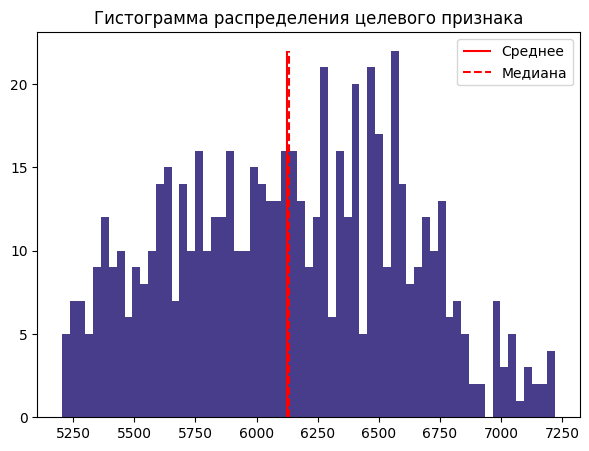

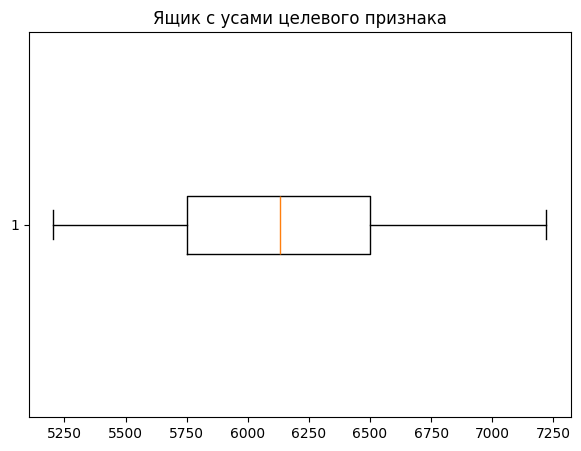

In [29]:
# распределение целевого признака yield
plt.rcParams["figure.figsize"] = (7, 5)
bins = plt.hist(ferma_main['yield'], bins=63, color='darkslateblue')
plt.vlines(x=ferma_main['yield'].mean(), colors='red', 
           ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=ferma_main['yield'].median(), colors='red', ymin=bins[0].min(), 
           ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('Гистограмма распределения целевого признака')
plt.legend()
plt.show()

# ящик с усами целевого признака
plt.title('Ящик с усами целевого признака')
plt.boxplot(x=ferma_main['yield'], vert=False)
plt.show()

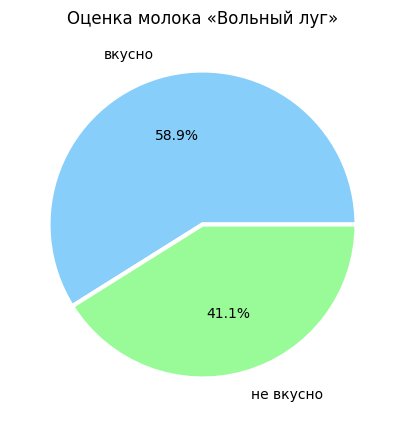

In [30]:
# диаграмма milk_taste
plt.rcParams["figure.figsize"] = (25,5)
fig, ax = plt.subplots()
ax.pie(ferma_main.milk_taste.value_counts(), 
       labels=('вкусно', 'не вкусно'),
       autopct='%1.1f%%', labeldistance=1.15,
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
       colors=['lightskyblue', 'palegreen'])
plt.title('Оценка молока «Вольный луг»')
plt.show()

## Графики входных признаков

### Количественные признаки

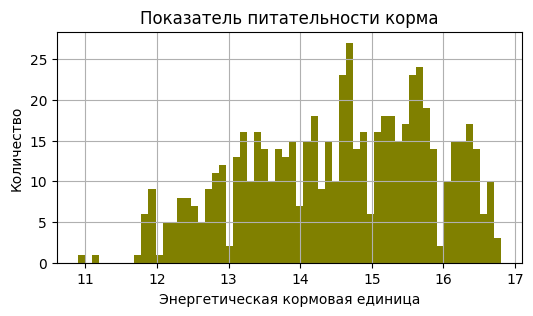

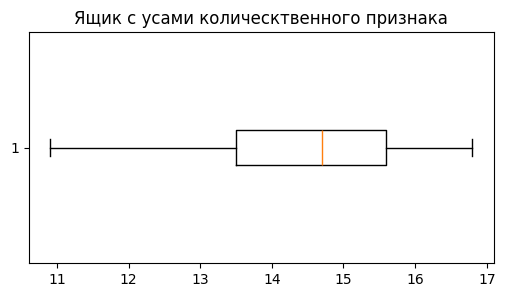

In [31]:
# efu
ferma_main.efu.hist(bins=60, figsize=(6, 3), color='olive')
plt.title('Показатель питательности корма')
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Количество')
plt.show()

plt.rcParams["figure.figsize"] = (6, 3)
plt.title('Ящик с усами колическтвенного признака')
plt.boxplot(x=ferma_main.efu, vert=False, )
plt.show()

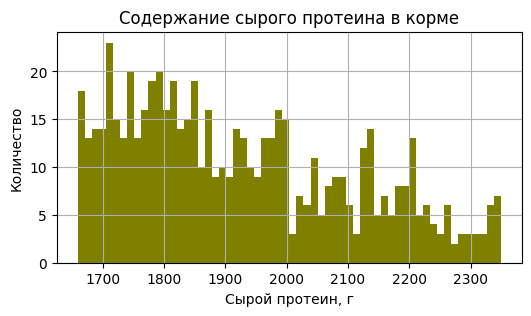

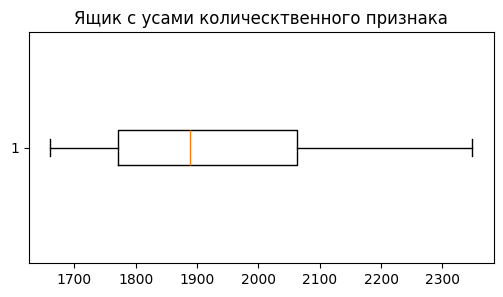

In [32]:
# crude_protein
ferma_main.crude_protein.hist(bins=60, figsize=(6, 3), color='olive')
plt.title('Содержание сырого протеина в корме')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Количество')
plt.show()

plt.rcParams['figure.figsize'] = (6, 3)
plt.title('Ящик с усами колическтвенного признака')
plt.boxplot(x=ferma_main.crude_protein, vert=False, )
plt.show()

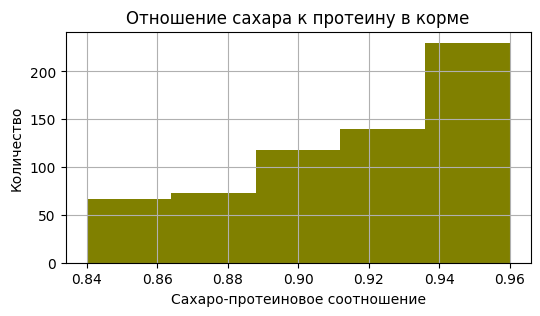

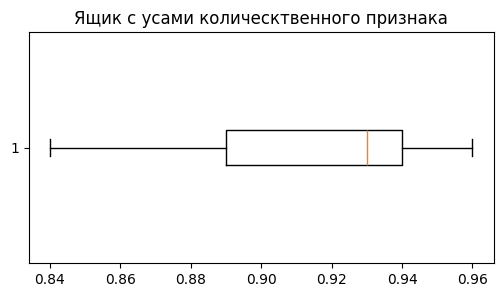

In [33]:
# spr
ferma_main.spr.hist(bins=5, figsize=(6, 3), color='olive')
plt.title('Отношение сахара к протеину в корме')
plt.xlabel('Сахаро-протеиновое соотношение')
plt.ylabel('Количество')
plt.show()

plt.rcParams['figure.figsize'] = (6, 3)
plt.title('Ящик с усами колическтвенного признака')
plt.boxplot(x=ferma_main.spr, vert=False, )
plt.show()

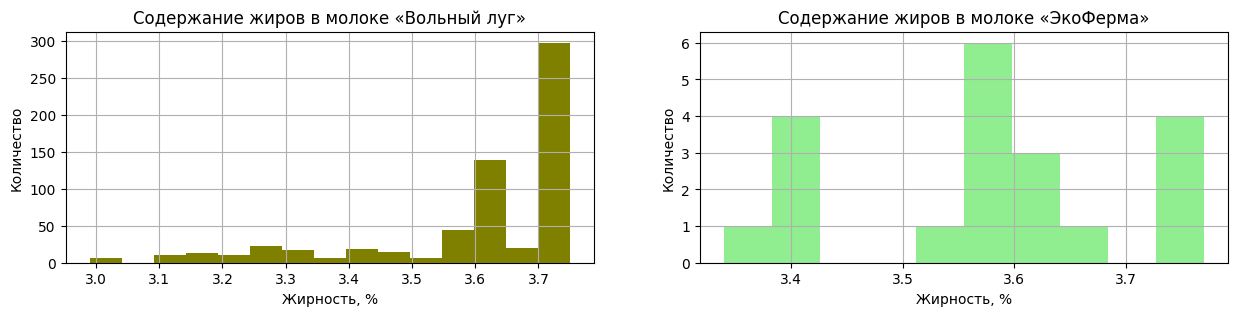

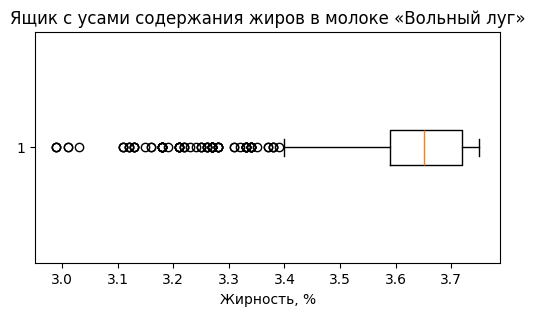

In [34]:
# fat
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
ferma_main.fat.plot(kind='hist', bins=15, ax=axes[0], color='olive', grid=True)
axes[0].set_title('Содержание жиров в молоке «Вольный луг»')
axes[0].set_xlabel('Жирность, %')
axes[0].set_ylabel('Количество')
cow_buy.fat.plot(kind='hist', bins=10, ax=axes[1], color='lightgreen', grid=True)
axes[1].set_title('Содержание жиров в молоке «ЭкоФерма»')
axes[1].set_xlabel('Жирность, %')
axes[1].set_ylabel('Количество')
plt.show()

plt.rcParams['figure.figsize'] = (6, 3)
plt.title('Ящик с усами содержания жиров в молоке «Вольный луг»')
plt.boxplot(x=ferma_main.fat, vert=False, )
plt.xlabel('Жирность, %')
plt.show()

Присутствуют выбросы от 3 до 3.4 %, проверим количество

In [35]:
emission = len(ferma_main.query('fat < 3.4')) / ferma_main.shape[0] * 100
print(f'Количество выбросов {emission:.2f}%')

Количество выбросов 13.69%


Оптимальный порог фильтрации данных 5-10 %, выбросы превышаю этот порог. Поэтому оставим их как есть, к тому же на прилавках магазинов существует молоко с жирностью менее 3.4%

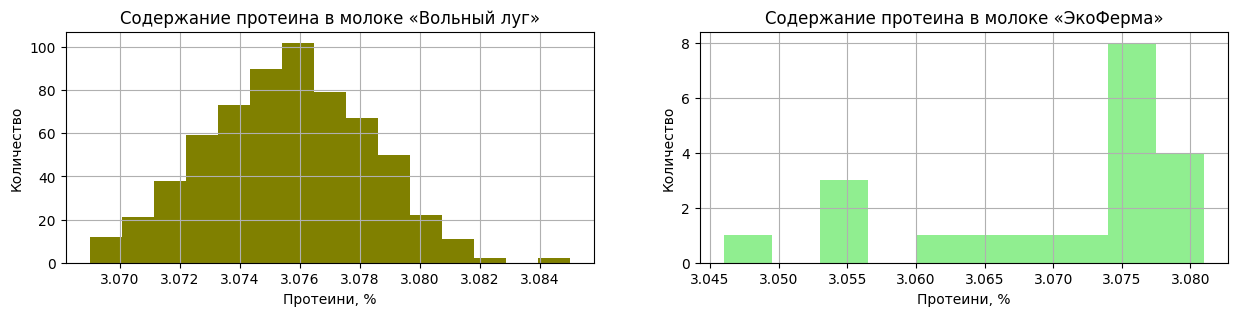

In [36]:
# protein
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
ferma_main.protein.plot(kind='hist', bins=15, ax=axes[0], color='olive', grid=True)
axes[0].set_title('Содержание протеина в молоке «Вольный луг»')
axes[0].set_xlabel('Протеини, %')
axes[0].set_ylabel('Количество')

cow_buy.protein.plot(kind='hist', bins=10, ax=axes[1], color='lightgreen', grid=True)
axes[1].set_title('Содержание протеина в молоке «ЭкоФерма»')
axes[1].set_xlabel('Протеини, %')
axes[1].set_ylabel('Количество')
plt.show()

### Категориальные признаки

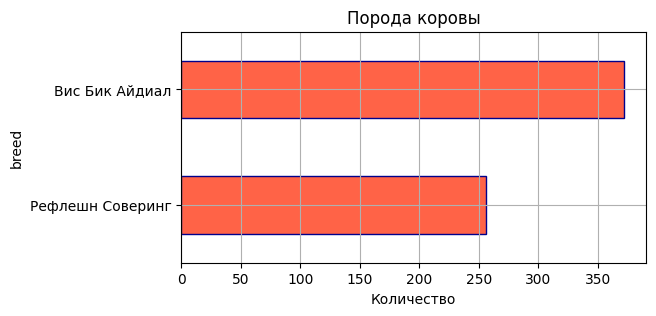

In [37]:
# breed
(ferma_main.breed.value_counts()
 .sort_values(ascending=True)
 .plot(y='milk_taste', figsize=(6, 3), 
       grid=True, kind='barh', 
       color='tomato', edgecolor='darkblue'))
plt.title('Порода коровы')
plt.xlabel('Количество')
plt.show()

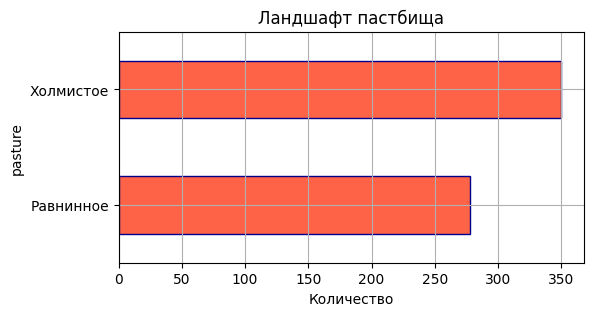

In [38]:
# pasture
(ferma_main.pasture.value_counts()
 .sort_values(ascending=True)
 .plot(y='milk_taste', figsize=(6, 3), 
       grid=True, kind='barh', 
       color='tomato', edgecolor='darkblue'))

plt.title('Ландшафт пастбища')
plt.xlabel('Количество')
plt.show()

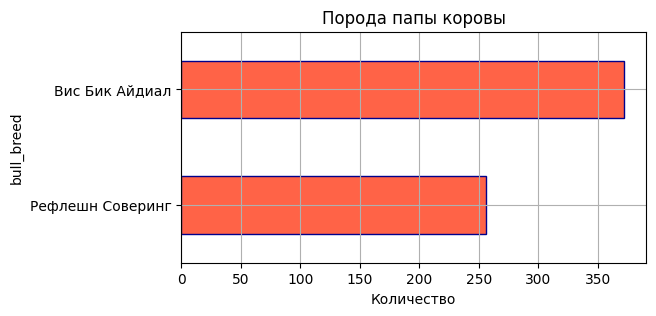

In [39]:
# bull_breed
(ferma_main.bull_breed.value_counts()
 .sort_values(ascending=True)
 .plot(y='milk_taste', figsize=(6, 3), 
       grid=True, kind='barh', 
       color='tomato', edgecolor='darkblue'))

plt.title('Порода папы коровы')
plt.xlabel('Количество')
plt.show()

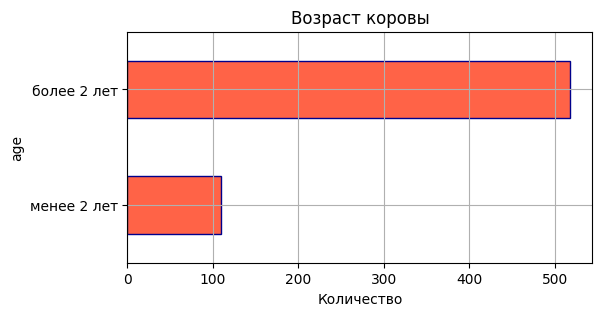

In [40]:
# age
(ferma_main.age.value_counts()
 .sort_values(ascending=True)
 .plot(y='milk_taste', figsize=(6, 3), 
       grid=True, kind='barh', 
       color='tomato', edgecolor='darkblue'))

plt.title('Возраст коровы')
plt.xlabel('Количество')
plt.show()

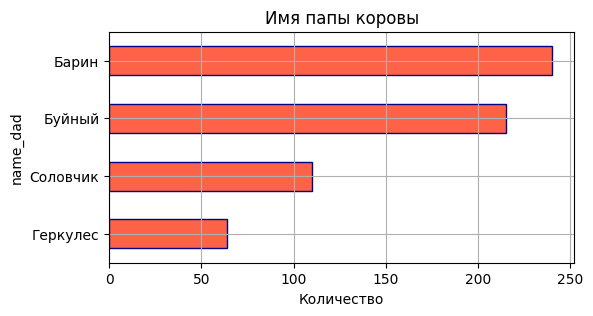

In [41]:
# age
(ferma_dad.name_dad.value_counts()
 .sort_values(ascending=True)
 .plot(y='milk_taste', figsize=(6, 3), 
       grid=True, kind='barh', 
       color='tomato', edgecolor='darkblue'))

plt.title('Имя папы коровы')
plt.xlabel('Количество')
plt.show()

## Вывод

Показатели фермы «Вольный луг».

Количественные:
- значения целевого признака удой нормально распределено с небольшим отклонение в право от среднего значения, выбросы и аномалии отсутствуют. Средний показатель 6 125, минимальный 5 204, максимальный 7 222 кг;
- значения целевого признака вкус молока таковы, на пастбище «Вольный луг» преобладает вкусное молоко, с разницей по отношению к не вкусному примерно на 9%;
- значения ЭКЕ похоже на нормальное распределение с пиком в районе 13.5 единиц, выбросы и аномалии отсутствуют. Средний показатель 14.55, минимальный 10.9, максимальный 16.8 ед;
- значения сырого протеина убывает, выбросы и аномалии отсутствуют. Средний показатель 1 924, минимальный 1 660, максимальный 2 349 г;
- значения СПО возрастает, выбросы и аномалии отсутствуют. Средний показатель 0.91, минимальный 0.84, максимальный 0.96;
- присутствуют выбросы от 3 до 3.4 % по жирности, что составляет 13.69% от общего количества данных. Это выше допустимого порога фильтрации данных в 5-10%, оставим их как есть. К тому же на прилавках машазинов существует молоко с жирностью менее 3.4%. Значения жирности показывает, что в основном молоко жирное, аномалии отсутствуют. Средний показатель 3.6, минимальный 2.9, максимальный 3.75 %;
- значения протеина нормально распределено, выбросы и аномалии отсутствуют. Минимальный 3.07, максимальный 3.08 %.

Качественные:
- в стаде преобладает порода Вис Бик Айдиал;
- в основном поголовье находится на холмистом ландшафте;
- по возрасту больше коров старше двух лет;
- лидирует папа коровы с иминем Борин.

Показатели фермы «ЭкоФерма»:

Количественные:
- значения жирности показывают, что выбросы и аномалии отсутствуют. Средний показатель 3.58, минимальный 3.34, максимальный 3.77 %;
- значения протеина показывают, что выбросы и аномалии отсутствуют. Минимальный 3.07, максимальный 3.08 %.

Качественные:
- в стаде преобладает порода Вис Бик Айдиал;
- в основном поголовье находится на холмистом ландшафте;
- по возрасту больше коров старше дыух леь;
- лидирует папа коровы с именем Барин.

# Корреляционный анализ ferma_main

## Взаимосвязь и коэффициенты корреляции

Изучим взаимосвязь между целевым и входными признаками. Если данные ненормально распределены, используем коэффициент корреляции Спирмена или Кендалла. Если нормально — коэффициент корреляции Пирсона. Учтем, что корреляционные связи в подгруппах могут различаться.

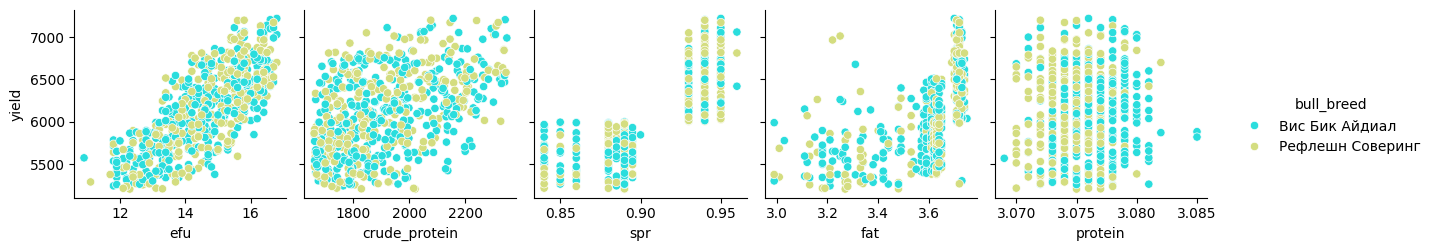

In [44]:
sns.pairplot(ferma_main, hue='bull_breed', palette='rainbow',
    x_vars=['efu', 'crude_protein', 'spr', 'fat', 'protein'],
    y_vars=['yield']
            )
plt.show()

Нормально распределены данные столбца *protein*, так же у столбца *spr* нормальное распределение в двух областях. В остальном данные распределены ненормально, поэтому используем корреляцию Спирмена. 

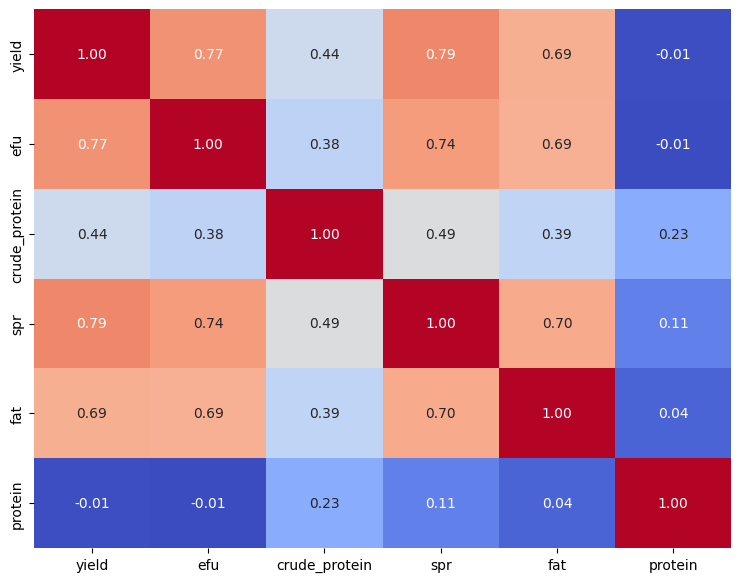

In [45]:
# тепловая карта признаков
plt.rcParams['figure.figsize'] = (9, 7)
(sns.heatmap(ferma_main[['yield', 'efu', 'crude_protein', 'spr', 'fat', 'protein']]
             .corr(method="spearman"), annot=True, fmt='.2f', cmap='coolwarm', cbar=False) 
)
plt.show()

Теплые тона говорят о сильной линейной зависимости, а холодные — о слабой. Судя по тепловой карте, корреляция с целевым признаком есть у сахаро-протеиновым соотношением, питательностью корма коровы и жирностью.

## Взаимосвязь признаков

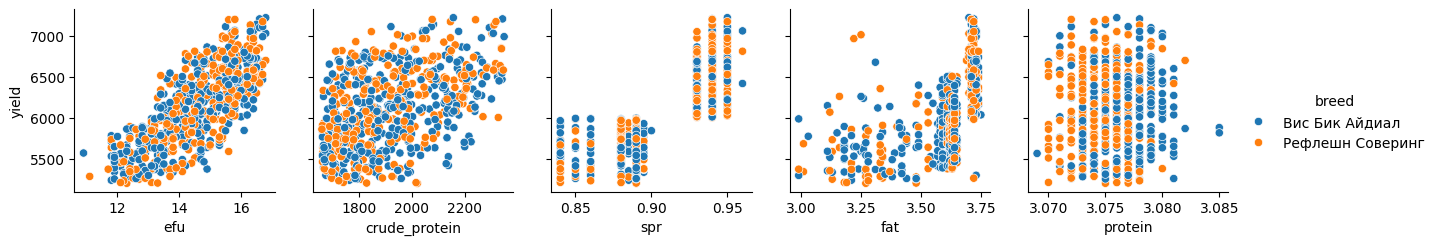

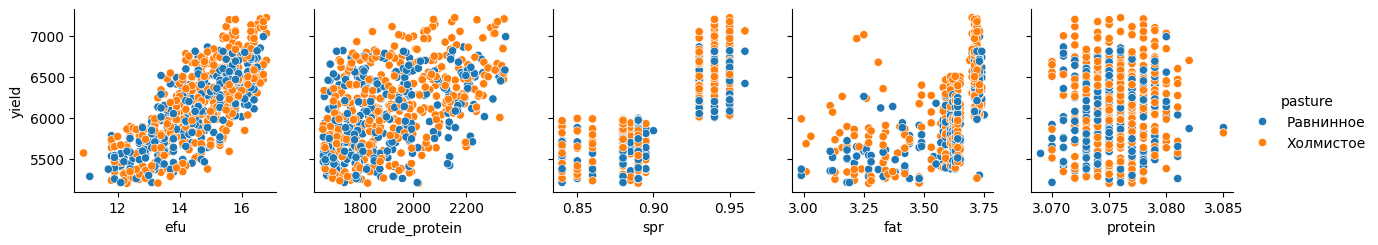

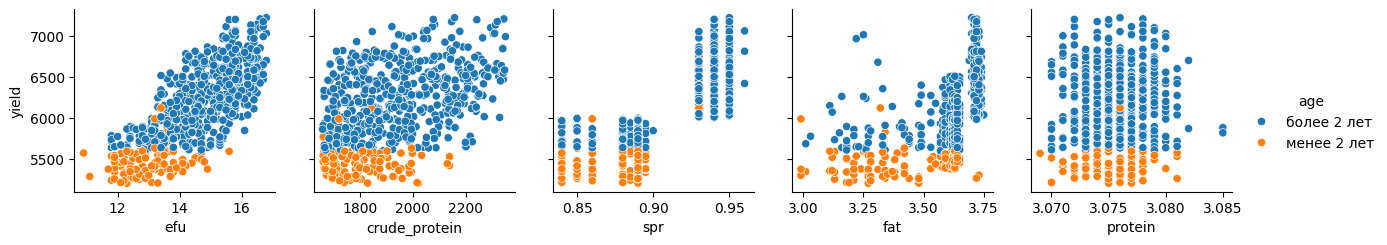

In [47]:
targ = 'yield'
factor = ['efu', 'crude_protein', 'spr', 'fat', 'protein']
cat = ['breed', 'pasture', 'age']
for category in cat:
    g = sns.PairGrid(ferma_main, hue=category, x_vars=factor, y_vars=targ)
    g.map(sns.scatterplot)
    g.add_legend()
    plt.show()

# Задача регрессии

Необходимо обучить три модели простой линейной регрессии.

## Первая модель, подготовка данных и обучение 

Чтобы понять, какие категориальные признаки задействовать для обучения модели, определим наибольшее количество записей с вкусным молоком в каждом входном категориальном признаке на основе личных критериев фермера.

In [48]:
ferma_main.query('milk_taste == "вкусно"')['breed'].value_counts()

breed
Вис Бик Айдиал      218
Рефлешн Соверинг    152
Name: count, dtype: int64

In [49]:
ferma_main.query('milk_taste == "вкусно"')['pasture'].value_counts()

pasture
Холмистое    234
Равнинное    136
Name: count, dtype: int64

In [50]:
ferma_main.query('milk_taste == "вкусно"')['age'].value_counts()

age
более 2 лет    319
менее 2 лет     51
Name: count, dtype: int64

Наибольшее количество записей по категории *age*, включим ее в обучение модели линейной регрессии. Также используем следующие входные признаки:

- efu и spr из-за явного наличия линейной связи с целевым признаком yield;
- crude_protein, так как данный признак находятся в группе явно коррелирующих с целевым признаком;
- age.

In [51]:
# списки признаков первой модели
num_col_m1 = ['efu', 'protein', 'spr']
cat_col_m1 = ['breed', 'pasture', 'bull_breed', 'age']

In [55]:
# собственная функция
def linear_model(data, num_col_m, cat_col_m):
    
    # уровень статистической значимости
    RANDOM_STATE = 42 
    
    # разделим датасет на тренировочную и тестовую выборки
    X = data.drop('yield', axis=1)
    y = data['yield']
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE
    )
    
    # списки количественных и качественных признаков тренировочной выборки
    num_col_names = num_col_m
    cat_col_names = cat_col_m
    
    # визуализация
    print('Графики признаков до масштабирования')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
    X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

    # определим метод масштабирования
    scaler = StandardScaler()
    
    # обучим и трансформируем количественные признаки из тренировочной выборки 
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    
    # выполним преобразование количественных признаков в тестовой выборке
    X_test_scaled = scaler.transform(X_test[num_col_names])

    # создадим переменную с экземпляром класса OneHotEncoder
    # включим параметр для избегания появления дамми-ошибок,
    # отключим sparse-отображение
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    # обучим и трансформируем категориальные признаки из тренировочной выборки 
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

    # выполним преобразование категориальных признаков в тестовой выборке
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    # получим от кодировщика список новых столбцов и сохраним в новой переменной 
    encoder_col_names = encoder.get_feature_names_out()

    # создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    # для данных OHE названия столбцов укажем из переменной encoder_col_names
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # объединим все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # визуализация
    print('Графики признаков после масштабирования')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
    X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

    # инициализируем модель линейной регрессии
    model = LinearRegression()

    # обучим модель на тренировочных данных
    model.fit(X_train, y_train)

    # предсказания модели на тестовых данных 
    predictions = model.predict(X_test)

    # рассчет и анализ остатков
    residuals = y_test - predictions

    # значения R2 для линейной регрессии
    r2 = r2_score(y_test, predictions)
    
    # метрики качества
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    # визуализация
    print('Визуальная оценка качества модели регрессии')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
    sns.histplot(residuals, bins=40, kde=True, ax=axes[0])
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    sns.residplot(data=ferma_main, x=predictions, y=residuals, color='green', 
                  lowess=True, line_kws=dict(color="r"), ax=axes[1])
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    print(f'Прогноз {predictions.mean():.0f}')
    return model, X_train, X_test, y_train, y_test, encoder, scaler, mse, mae, rmse, r2, predictions, residuals

Графики признаков до масштабирования


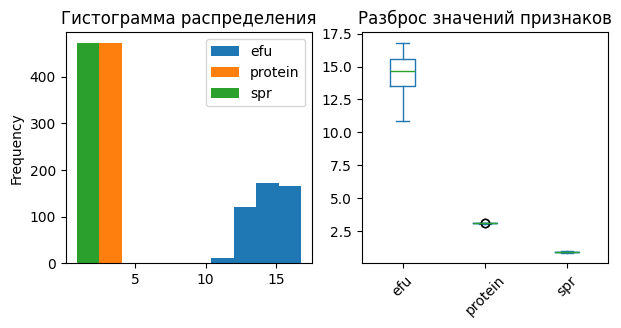

Графики признаков после масштабирования


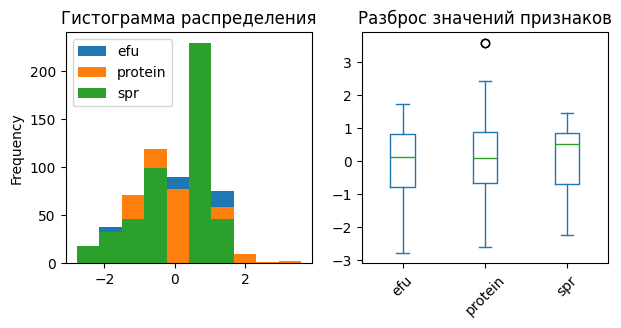

Визуальная оценка качества модели регрессии


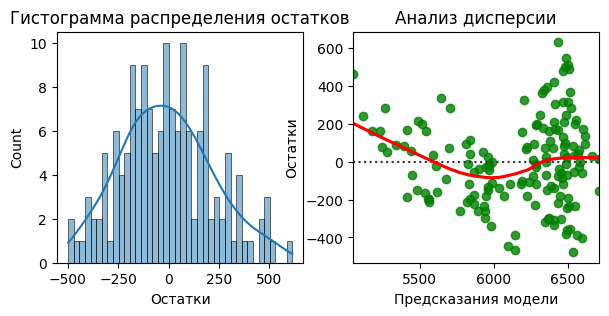

Прогноз 6151


In [56]:
# применим собственную функцию
(model_lr_1, X_train_1, X_test_1, y_train_1, 
 y_test_1, encoder_1, scaler_1, mse_1, 
 mae_1, rmse_1, r2_1, predictions_1, residuals_1) = linear_model(ferma_main, num_col_m1, cat_col_m1)

## Промежуточный вывод

При решении задачи регрессии мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 75 процентах случаев;
- R² принимает значения от [−∞; 1]. Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания;
- гистограмма распределения остатков показывает смещенное нормальное распределение. Так, если среднее значение смещено влево от нуля и равно примерно −50, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений;
- анализ дисперсии выявил увеличение разброса ошибки при предсказании большого объема удоя, модель не научилась хорошо предсказывать значения. На одном участке разброс значений остатков сильно больше, чем на другом, на диаграмме рассеяния начинает виднеться «рупор». У остатков нет нормального распределения и симметричного графика, то моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 3]. На общем фоне выднеляются значения сахаро-протеинового соотношения; 
- прогноз удоя в среднем больше на 9 кг;
- средняя абсолютная ошибка 183 кг.

## Вторая модель, подготовка данных и обучение 

In [57]:
# собственная функция
def spr_cat_sign(spr):
    if spr <= 0.915:
        return 0
    return 1

# добавим новый признак
ferma_main['spr_cat_sign'] = ferma_main.spr.apply(spr_cat_sign)

# efu square
ferma_main['efu_square'] = ferma_main.efu **2

# списки признаков
num_col_m2 = ['efu_square', 'protein', 'spr']
cat_col_m2 = ['spr_cat_sign', 'breed', 'pasture', 'bull_breed', 'age']

Графики признаков до масштабирования


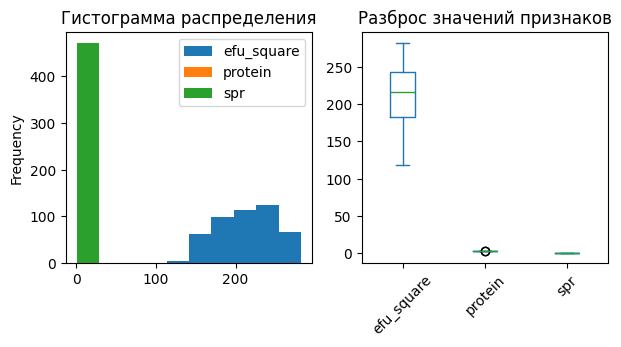

Графики признаков после масштабирования


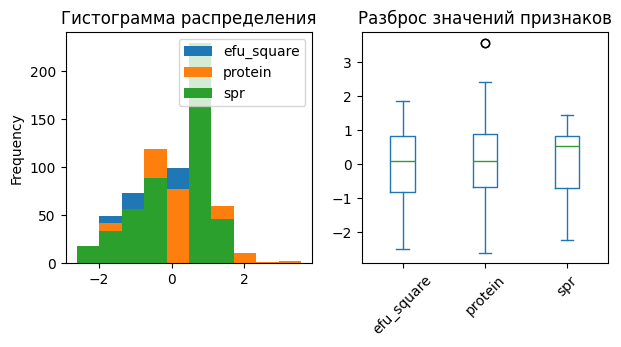

Визуальная оценка качества модели регрессии


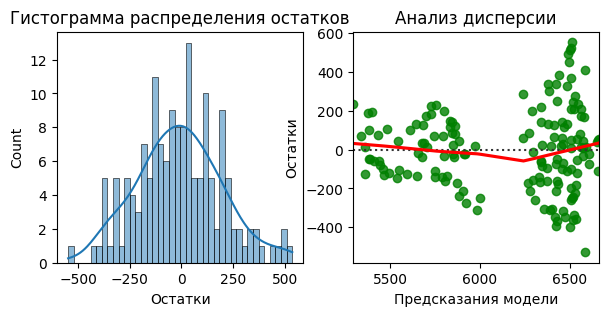

Прогноз 6151


In [58]:
# применим собственную функцию
(model_lr_2, X_train_2, X_test_2, y_train_2, y_test_2,
 encoder_2, scaler_2, mse_2, mae_2, rmse_2, r2_2,
 predictions_2, residuals_2) = linear_model(ferma_main, num_col_m2, cat_col_m2)

## Промежуточный вывод

При решении задачи регрессии мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 79 процентах случаев;
- гистограмма распределения остатков показывает нормальное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях и она стремится к нулю. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга. Такая модель работает качественно;
- анализ дисперсии выявил уменьшение разброса ошибки при предсказании объема удоя до 6 000 кг, модель не научилась хорошо предсказывать значения. На одном участке разброс значений остатков сильно больше, чем на другом, на диаграмме рассеяния начинает виднеться «рупор». У остатков нет нормального распределения и симметричного графика, но моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 2.5]. На общем фоне выднеляются значения сахаро-протеинового соотношения;
- прогноз удоя в среднем больше на 10 кг;
- средняя абсолютная ошибка 162 кг.

## Третья модель, подготовка данных и обучение 

Добавим в данные новый признак и обучим на них третью модель LinearRegression. Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу. Устраним нелинейность между признаками. Повторим шаги из пункта 1 и создадим третью модель: подготовим данные, обучим модель, оценим её качество и напишем выводы.

In [59]:
# новый признак Имя Папы
ferma_main = ferma_main.merge(ferma_dad, on='id', how='inner')

In [60]:
# списки признаков
num_col_m3 = ['efu_square', 'protein', 'spr', 'fat', 'efu']
cat_col_m3 = ['spr_cat_sign', 'breed', 'pasture', 'bull_breed', 'name_dad', 'age']

Графики признаков до масштабирования


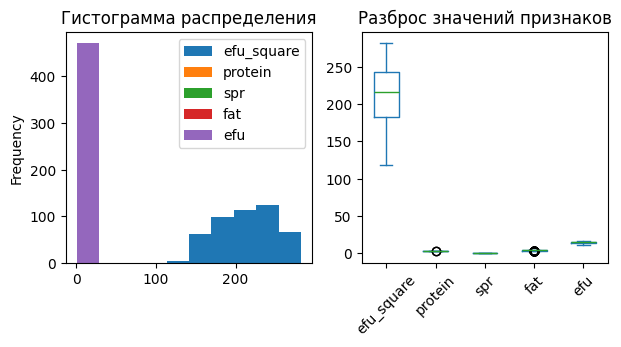

Графики признаков после масштабирования


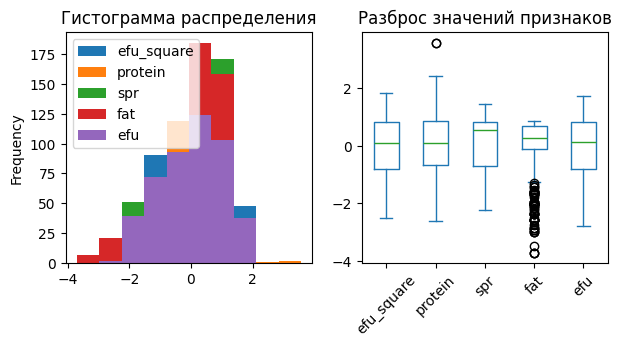

Визуальная оценка качества модели регрессии


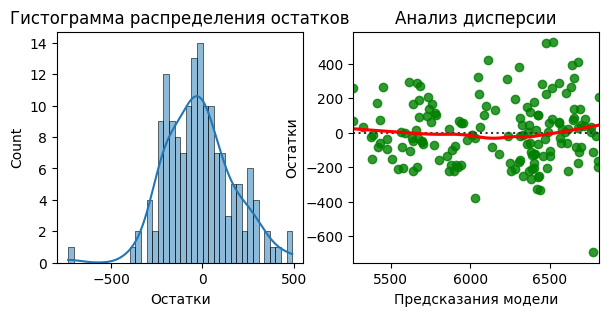

Прогноз 6160


In [61]:
# применим собственную функцию
(model_lr_3, X_train_3, X_test_3, y_train_3, y_test_3,
 encoder_3, scaler_3, mse_3, mae_3, rmse_3, r2_3, 
 predictions_3, residuals_3) = linear_model(ferma_main, num_col_m3, cat_col_m3)

## Промежуточный вывод

При решении задачи регрессии мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 83 процентах случаев;
- гистограмма распределения остатков показывает смещенное нормальное распределение. Так, если среднее значение смещено влево от нуля и равно примерно −40, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений;
- на одном участке разброс значений остатков сильно больше, чем на другом, модель не научилась хорошо предсказывать значения. У остатков нет нормального распределения и симметричного графика, но моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 2.5]. На общем фоне выднеляются значения сахаро-протеинового соотношения; 
- прогноз удоя в среднем больше на 20 кг;
- средняя абсолютная ошибка 146 кг.

## Качество трёх моделей 

Сравним качество трёх моделей линейной регрессии, сопоставим R² и остатки.

In [62]:
# таблица качества
index_tab = ['первая модель', 'вторая модель', 'третья модель']

In [63]:
data_quality = {
    'R2 Linear Regression': [r2_1, r2_2, r2_3],
    'mean_residuals': [residuals_1.mean(), residuals_2.mean(), residuals_3.mean()],
    'mean_predictions': [predictions_1.mean(), predictions_2.mean(), predictions_3.mean()]
}
pd.DataFrame(data_quality, index=index_tab).round(2)

,R2 Linear Regression,mean_residuals,mean_predictions
первая модель,0.75,-9.32,6150.98
вторая модель,0.79,-9.71,6151.37
третья модель,0.83,-18.43,6160.09


## Метрики качества 

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используем функции для расчёта метрик:
- выберем лучшую модель;
- укажем доверительный интервал прогноза лучшей модели, рассчитав квантили ошибки модели на тренировочных данных.

In [64]:
# таблица качества
data_metrix = {
    'MSE': [mse_1, mse_2, mse_3],
    'MAE': [mae_1, mae_2, mae_3],
    'RMSE': [rmse_1, rmse_2, rmse_3]
}
pd.DataFrame(data_metrix, index=index_tab).astype(int)

,MSE,MAE,RMSE
первая модель,51745,182,227
вторая модель,42022,161,204
третья модель,34404,144,185


После построения моделей лучший показатель R² у третьей - 83%. По остаткам у всех моделей примерно одинаковая картина.

Судя по моделирования третья модель показала лучшие резудьтаты:

- MSE - среднеквадратичная ошибка 34 404 кг²;
- MAE - чем меньше средняя абсолютная ошибка, тем лучше модель предсказывает целевой признак, 144 кг;
- RMSE - модель в среднем ошибается 185 кг молока.

In [68]:
# доверительный интервал прогноза модели
conf_interval = st.norm.interval(
    alpha=0.95, 
    loc=np.mean(predictions_3), 
    scale=st.sem(predictions_3)
)
print(f'Доверительный интервал {conf_interval}')
print(f'25й квантиль {np.quantile(predictions_3, 0.25):.0f}')
print(f'50й квантиль {np.quantile(predictions_3, 0.5):.0f}')
print(f'75й квантиль {np.quantile(predictions_3, 0.75):.0f}')

Доверительный интервал (6092.920240664989, 6227.257089627366)
25й квантиль 5758
50й квантиль 6306
75й квантиль 6501


Существует вероятность 95%, что доверительный интервал [6088, 6214] содержит истинный средний удой модели. Либо уществует только 5%-ная вероятность того, что истинный средний удой лежит за пределами 95%-го доверительного интервала. То есть существует только 5% вероятность того, что истинный средний удой меньше 6088 кг или больше 6214 кг.

## Прогноз удоя

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%. Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки. Получим прогноз удоя коров.

In [72]:
# новые столбцы +5%
cow_buy['efu'] = (ferma_main.efu.mean() * 1.05).round(1)
cow_buy['spr'] = (ferma_main.spr.mean() * 1.05).round(3)
cow_buy['crude_protein'] = (ferma_main.crude_protein.mean() * 1.05).round(0)

# добавим новый признак
cow_buy['spr_cat_sign'] = cow_buy.spr.apply(spr_cat_sign)

# efu square
cow_buy['efu_square'] = cow_buy.efu **2

In [76]:
num_col_m4 = ['efu_square', 'crude_protein', 'protein', 'spr', 'fat', 'efu']
cat_col_m4 = ['spr_cat_sign', 'breed', 'pasture', 'bull_breed', 'name_dad', 'age']

In [77]:
# даные для прогноза
X_data_yield = cow_buy

# уровень статистической значимости
RANDOM_STATE = 42

# разделим датасет на тренировочную и тестовую выборки
X_4 = ferma_main.drop('yield', axis=1)
y_4= ferma_main['yield']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_4,
    y_4,
    random_state=RANDOM_STATE
)

# списки количественных и качественных признаков тренировочной выборки
num_col_names = num_col_m4
cat_col_names = cat_col_m4

# определим метод масштабирования
scaler_4 = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled_4 = scaler_4.fit_transform(X_train_4[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_data_yield_scaled = scaler_4.transform(X_data_yield[num_col_names])

# создадим переменную с экземпляром класса OneHotEncoder
# включим параметр для избегания появления дамми-ошибок,
# отключим sparse-отображение
encoder_4 = OneHotEncoder(drop='first', sparse_output=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe_4 = encoder_4.fit_transform(X_train_4[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_data_yield_ohe = encoder_4.transform(X_data_yield[cat_col_names]) 

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names_4 = encoder_4.get_feature_names_out()

# создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names
X_train_ohe_4 = pd.DataFrame(X_train_ohe_4, columns=encoder_col_names_4)
X_data_yield_ohe = pd.DataFrame(X_data_yield_ohe, columns=encoder_col_names_4)

X_train_scaled_4 = pd.DataFrame(X_train_scaled_4, columns=num_col_names)
X_data_yield_scaled = pd.DataFrame(X_data_yield_scaled, columns=num_col_names)

# объединим все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train_4 = pd.concat([X_train_ohe_4, X_train_scaled_4], axis=1)
X_data_yield = pd.concat([X_data_yield_ohe, X_data_yield_scaled], axis=1)

# инициализируем модель линейной регрессии
model_lr_4  = LinearRegression()

# обучим модель на тренировочных данных
model_lr_4.fit(X_train_4, y_train_4)

# предсказания модели на тестовых данных 
predictions_4 = model_lr_4.predict(X_data_yield)

## Вывод

При решении задачи регрессии №1 мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 75 процентах случаев;
- R² принимает значения от [−∞; 1]. Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания;
- гистограмма распределения остатков показывает смещенное нормальное распределение. Так, если среднее значение смещено влево от нуля и равно примерно −50, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений;
- анализ дисперсии выявил увеличение разброса ошибки при предсказании большого объема удоя, модель не научилась хорошо предсказывать значения. На одном участке разброс значений остатков сильно больше, чем на другом, на диаграмме рассеяния начинает виднеться «рупор». У остатков нет нормального распределения и симметричного графика, то моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 3]. На общем фоне выднеляются значения сахаро-протеинового соотношения; 
- прогноз удоя в среднем больше на 9 кг;
- средняя абсолютная ошибка 183 кг.

При решении задачи регрессии №2 мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 79 процентах случаев;
- гистограмма распределения остатков показывает нормальное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях и она стремится к нулю. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга. Такая модель работает качественно;
- анализ дисперсии выявил уменьшение разброса ошибки при предсказании объема удоя до 6 000 кг, модель не научилась хорошо предсказывать значения. На одном участке разброс значений остатков сильно больше, чем на другом, на диаграмме рассеяния начинает виднеться «рупор». У остатков нет нормального распределения и симметричного графика, но моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 2.5]. На общем фоне выднеляются значения сахаро-протеинового соотношения;
- прогноз удоя в среднем больше на 10 кг;
- средняя абсолютная ошибка 162 кг.

При решении задачи регрессии №3 мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 83 процентах случаев;
- гистограмма распределения остатков показывает смещенное нормальное распределение. Так, если среднее значение смещено влево от нуля и равно примерно −40, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений;
- на одном участке разброс значений остатков сильно больше, чем на другом, модель не научилась хорошо предсказывать значения. У остатков нет нормального распределения и симметричного графика, но моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 2.5]. На общем фоне выднеляются значения сахаро-протеинового соотношения; 
- прогноз удоя в среднем больше на 20 кг;
- средняя абсолютная ошибка 146 кг.

Судя по моделирования третья модель показала лучшие резудьтаты:

- MSE - среднеквадратичная ошибка 35089 кг²;
- MAE - чем меньше средняя абсолютная ошибка, тем лучше модель предсказывает целевой признак, 146 кг;
- RMSE - модель в среднем ошибается 187 кг молока.

Существует вероятность 95%, что доверительный интервал третьей модели [6088, 6214] содержит истинный средний удой. Либо уществует только 5%-ная вероятность того, что истинный средний удой лежит за пределами 95%-го доверительного интервала. То есть существует только 5% вероятность того, что истинный средний удой меньше 6088 кг или больше 6214 кг.

# Задача классификации

Необходимо обучить модель логистической регрессии

## Подготовка данных и обучение 

Подготовим данные датасета ferma_main.csv и обучите на них модель LogisticRegression. Используем в качестве целевого признак Вкус молока. При необходимости преобразуем имеющиеся или добавим новые признаки. Разобьем данные на тренировочную и тестовую выборки. Кодируем категориальные признаки с помощью OneHotEncoder. Масштабируем количественные признаки с помощью StandardScaler. Обучим модель логистической регрессии на подготовленных данных. Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision. Построим матрицу ошибок.

Добавим новый столбец, который характеризует вкус молока, для оценки точности модели.

In [79]:
# собственная функция
def milk_taste_cat(milk_taste):
    if milk_taste == 'вкусно':
        return 1
    return 0

# добавим категориальный признак
ferma_main['milk_taste_cat'] = ferma_main.milk_taste.apply(milk_taste_cat)

In [80]:
# списки признаков
num_col_m4 = ['yield', 'efu_square', 'crude_protein', 'protein', 'fat', 'spr']
cat_col_m4 = ['spr_cat_sign', 'breed', 'pasture', 'bull_breed', 'name_dad', 'age']

In [83]:
# создадим собственную функцию
def logistic_model(data, num_col_m, cat_col_m):
    # построим модель бинарной классификации
    # разделим датасет на тренировочную и тестовую выборки
    X = data.drop('milk_taste', axis=1)
    y = data.milk_taste_cat
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE,
        stratify=y
    )

    # списки количественных и качественных признаков тренировочной выборки
    num_col_names = num_col_m
    cat_col_names = cat_col_m

    # определим метод масштабирования
    scaler = StandardScaler()

    # обучим и трансформируем количественные признаки из тренировочной выборки 
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])

    # выполним преобразование количественных признаков в тестовой выборке
    X_test_scaled = scaler.transform(X_test[num_col_names])

    # создадим переменную с экземпляром класса OneHotEncoder
    # включим параметр для избегания появления дамми-ошибок,
    # отключим sparse-отображение
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    # обучим и трансформируем категориальные признаки из тренировочной выборки 
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    
    # выполним преобразование категориальных признаков в тестовой выборке
    X_test_ohe = encoder.transform(X_test[cat_col_names]) 
    
    # получим от кодировщика список новых столбцов и сохраним в новой переменной 
    encoder_col_names = encoder.get_feature_names_out()
    
    # создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    # для данных OHE названия столбцов укажем из переменной encoder_col_names
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # объединим все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # создаём объект для работы с моделью
    clf = LogisticRegression()
    
    # обучаем модель на данных
    clf = clf.fit(X_train, y_train)
    
    # получаем прогнозные метки классов с помощью 
    # функции прогнозирования predict() с стандартным порогом 0.5
    y_pred = clf.predict(X_test)
    
    # матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    
    # проводим оценку точности
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred)
    return clf, acc, recall, precision, cm, y_test, y_pred, X_test 

In [84]:
# результат работы функции
clf_5, acc_5, recall_5, precision_5, cm, y_test_5, y_pred_5, X_test_5 = (
    logistic_model(ferma_main, num_col_m4, cat_col_m4)
)

Сравним  значения целевого признака на тестовой части выборки y_test и прогнозные значения y_pred модели.

In [85]:
print(f'accuracy {acc_5:.2f}')
print(f'recall {recall_5:.2f}')
print(f'precision {precision_5:.2f}')

accuracy 0.63
recall 0.78
precision 0.65


Accuracy оценивает только то, сколько значений модель смогла правильно предсказать

In [86]:
# сравним реальные метки классов с предсказанными
pd.DataFrame(zip(y_test_5, y_pred_5), columns = ['test','pred']).head() 

,test,pred
0,1,1
1,0,1
2,1,1
3,1,1
4,1,0


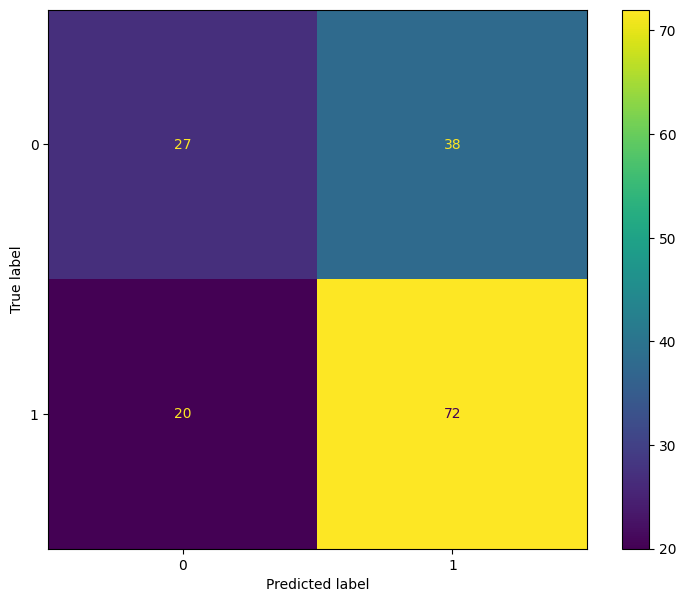

In [88]:
# матрица ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_5.classes_)
disp.plot()
plt.show()

Итого: модель 20 раза ошибочно предсказывает, что молоко вкусное, и 38 раз — не вкусное.

Ошибка первого рода 0 1 False Positive (FP) 38

Ошибка второго рода 1 0 False Negative (FN) 20

## Проанализируем модель логистической регрессии

- объясним, какая ошибка критичнее всего при покупке коров: первого или второго рода. Главное для заказчика — вкусное молоко. Сформулируем ответ с учётом метрик recall и precision, выберем важную из них;
- сведем критичную ошибку к нулю: для этого изменим порог принадлежности к классам. Ещё раз рассчитаем значения метрик recall и precision. Какое значение порога выберем? Как изменились значения метрик?;
- оформим выводы: скажем, что нужно сделать дальше, исходя из анализа модели?

In [94]:
# функция predict_proba возвращает оценки вероятности для каждого класса
y_proba = clf_5.predict_proba(X_test_5)[:,1]
data = pd.DataFrame(zip(y_test_5, y_proba),
                    columns = ['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

# пороги
thresholds = [round(i,2) for i in np.linspace(0.5, 1, num = 10, endpoint=False)]

prec_score = []
for i in thresholds:
    result = precision_score(data['y_valid'],
                     (clf_5.predict_proba(X_test_5)[:,1] >= i).astype(int),
                    zero_division=1.0
                   )
    prec_score.append(result)

# добавим столбцы с порогами
columns = []
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(
        lambda x: 1 if x >= i else 0)
    
data.head()

,y_valid,y_proba,y_pred_0.5,y_pred_0.55,y_pred_0.6,y_pred_0.65,y_pred_0.7,y_pred_0.75,y_pred_0.8,y_pred_0.85,y_pred_0.9,y_pred_0.95
94,1,0.903348,1,1,1,1,1,1,1,1,1,0
124,1,0.884067,1,1,1,1,1,1,1,1,0,0
16,1,0.879114,1,1,1,1,1,1,1,1,0,0
7,1,0.874767,1,1,1,1,1,1,1,1,0,0
138,1,0.865529,1,1,1,1,1,1,1,1,0,0


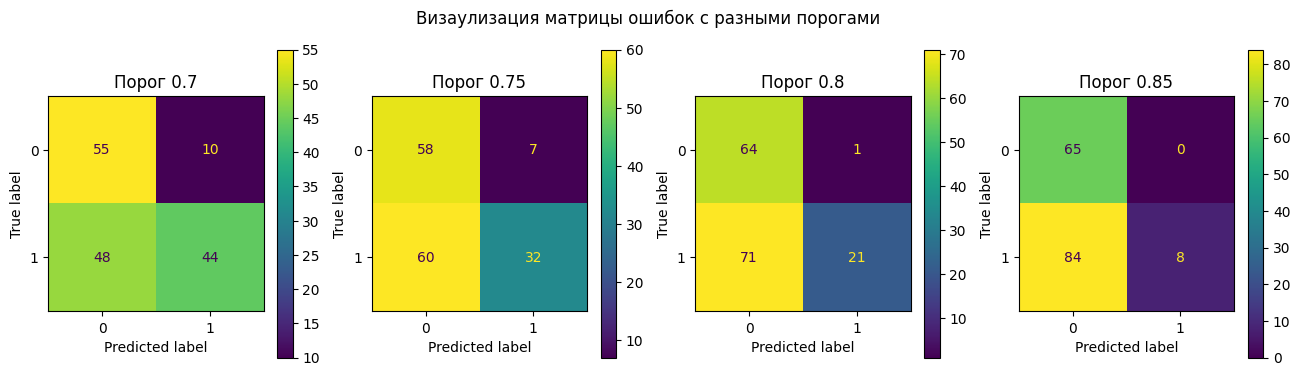

In [95]:
# матрица ошибок
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(16, 4))
fig.suptitle('Визаулизация матрицы ошибок с разными порогами')
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(data['y_valid'], data['y_pred_0.7']),
    display_labels=clf_5.classes_).plot(ax=axes[0])
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(data['y_valid'], data['y_pred_0.75']), 
    display_labels=clf_5.classes_).plot(ax=axes[1])
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(data['y_valid'], data['y_pred_0.8']),
    display_labels=clf_5.classes_).plot(ax=axes[2])
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(data['y_valid'], data['y_pred_0.85']), 
    display_labels=clf_5.classes_).plot(ax=axes[3])
axes[0].set_title('Порог 0.7')
axes[1].set_title('Порог 0.75')
axes[2].set_title('Порог 0.8')
axes[3].set_title('Порог 0.85')
plt.show()

False Positive стремится к нулю при пороге 0.85, модель 0 раза ошибочно предсказывает, что молоко вкусное, и 84 раз — не вкусное:

- ошибка первого рода 0 1 False Positive (FP) 0;
- ошибка второго рода 1 0 False Negative (FN) 84.

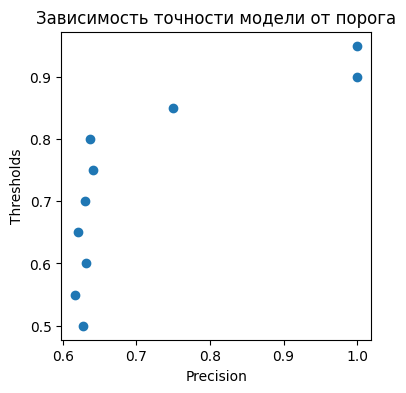

In [100]:
# визуализация presicion для разных значений threshold
plt.rcParams["figure.figsize"] = (4, 4)
plt.scatter(prec_score, thresholds)
plt.title('Зависимость точности модели от порога')
plt.xlabel('Precision')
plt.ylabel('Thresholds')
plt.show()

In [106]:
# используем порог 0.85 для расчета метрик
print(accuracy_score(data['y_valid'], data['y_pred_0.85']))
print(recall_score(data['y_valid'], data['y_pred_0.85']))
precision_score(data['y_valid'], data['y_pred_0.85'])

0.46496815286624205
0.08695652173913043


1.0

## Вывод

Решая задачу классификации выделили следующие моменты:

- при покупке коров критичнее всего ошибка первого рода. Precision показывает, всегда ли модель верно предсказывает вкус молока. 
Recall - обратная precision подскажет, все ли вкусы молока удалось удалось предугадать. На русском языке её называют полнотой;
- путем изменения порогов определил лучший - 0.85, при этом False Positive стремится к 0;
- после определения оптимального порога, первая по важности метрика `precision_score` равна единице. Противоположная метрика `recall_score` стремится к нулю;
- далее можно спрогнозировать вкус молока и отсеять коров по требованиям заказчика.

# Прогноз вкуса молока

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить.

In [108]:
# списки признаков
num_col_m5 = ['efu_square', 'protein', 'crude_protein', 'fat', 'spr', 'efu']
cat_col_m5 = ['spr_cat_sign', 'breed', 'pasture', 'bull_breed', 'name_dad', 'age']

In [109]:
# даные для прогноза
X_data_taste = cow_buy

# построим модель бинарной классификации
# разделим датасет на тренировочную и тестовую выборки
X_6 = ferma_main.drop('milk_taste', axis=1)
y_6 = ferma_main.milk_taste_cat
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(
    X_6,
    y_6,
    random_state=RANDOM_STATE,
    stratify=y_6
)

# списки количественных и качественных признаков тренировочной выборки
num_col_names = num_col_m5
cat_col_names = cat_col_m5

# определим метод масштабирования
scaler_6 = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled_6 = scaler_6.fit_transform(X_train_6[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_data_taste_scaled = scaler_6.transform(X_data_taste[num_col_names])

# создадим переменную с экземпляром класса OneHotEncoder
# включим параметр для избегания появления дамми-ошибок,
# отключим sparse-отображение
encoder_6 = OneHotEncoder(drop='first', sparse_output=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe_6 = encoder_6.fit_transform(X_train_6[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_data_taste_ohe = encoder_6.transform(X_data_taste[cat_col_names]) 

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names_6 = encoder_6.get_feature_names_out()

# создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names
X_train_ohe_6 = pd.DataFrame(X_train_ohe_6, columns=encoder_col_names_6)
X_data_taste_ohe = pd.DataFrame(X_data_taste_ohe, columns=encoder_col_names_6)

X_train_scaled_6 = pd.DataFrame(X_train_scaled_6, columns=num_col_names)
X_data_taste_scaled = pd.DataFrame(X_data_taste_scaled, columns=num_col_names)

# объединим все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасим индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train_6 = pd.concat([X_train_ohe_6, X_train_scaled_6], axis=1)
X_data_taste = pd.concat([X_data_taste_ohe, X_data_taste_scaled], axis=1)

# создаём объект для работы с моделью
clf_6 = LogisticRegression()

# обучаем модель на данных
clf_6 = clf_6.fit(X_train_6, y_train_6)

# Итоговые выводы

## Выведем прогнозы вкуса молока

Добавим прогнозы вкуса молока и удоя

In [112]:
# функция predict_proba возвращает оценки вероятности для каждого класса
y_proba_milk = clf_6.predict_proba(X_data_taste)[:,1]

In [113]:
# добавим новые предсказания в таблицу
forecast = pd.merge(cow_buy.copy(),
                    pd.DataFrame({'yield_forecast': (predictions_4).astype(int),
                                   'taste_forecast': y_proba_milk}),
                    left_index=True, right_index=True
                   )
forecast

,breed,pasture,bull_breed,name_dad,fat,protein,age,efu,spr,crude_protein,spr_cat_sign,efu_square,yield_forecast,taste_forecast
0,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Геркулес,3.58,3.076,более 2 лет,15.3,0.959,2020.0,1,234.09,6580,0.817874
1,Вис Бик Айдиал,Равнинное,Вис Бик Айдиал,Буйный,3.54,3.081,менее 2 лет,15.3,0.959,2020.0,1,234.09,6222,0.807967
2,Рефлешн Соверинг,Равнинное,Рефлешн Соверинг,Барин,3.59,3.074,более 2 лет,15.3,0.959,2020.0,1,234.09,6245,0.718230
3,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,Буйный,3.40,3.061,более 2 лет,15.3,0.959,2020.0,1,234.09,6674,0.732700
4,Рефлешн Соверинг,Равнинное,Вис Бик Айдиал,Буйный,3.64,3.074,более 2 лет,15.3,0.959,2020.0,1,234.09,6541,0.727936
5,Рефлешн Соверинг,Равнинное,Рефлешн Соверинг,Геркулес,3.63,3.053,менее 2 лет,15.3,0.959,2020.0,1,234.09,6550,0.252201
6,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Геркулес,3.58,3.076,более 2 лет,15.3,0.959,2020.0,1,234.09,6580,0.817874
7,Вис Бик Айдиал,Равнинное,Вис Бик Айдиал,Буйный,3.57,3.079,более 2 лет,15.3,0.959,2020.0,1,234.09,6471,0.808963
8,Рефлешн Соверинг,Равнинное,Рефлешн Соверинг,Барин,3.59,3.074,более 2 лет,15.3,0.959,2020.0,1,234.09,6245,0.718230
9,Рефлешн Соверинг,Холмистое,Вис Бик Айдиал,Буйный,3.40,3.079,менее 2 лет,15.3,0.959,2020.0,1,234.09,6264,0.890474


## Отберем коров

Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко. Чтобы понять, это, сортируем 
датафрейм *cow_buy* с помощью пороговых значений. Выделим несколько групп риска вложений на выбор для фермера:

- риск 35%;
- риск 25%;
- риск 15%.

Используем найденные пороги, минимизирующие риск и получим прогнозы.

In [114]:
# риск 35%
forecast.query('yield_forecast >= 6000 and taste_forecast >= 0.65')

,breed,pasture,bull_breed,name_dad,fat,protein,age,efu,spr,crude_protein,spr_cat_sign,efu_square,yield_forecast,taste_forecast
0,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Геркулес,3.58,3.076,более 2 лет,15.3,0.959,2020.0,1,234.09,6580,0.817874
1,Вис Бик Айдиал,Равнинное,Вис Бик Айдиал,Буйный,3.54,3.081,менее 2 лет,15.3,0.959,2020.0,1,234.09,6222,0.807967
2,Рефлешн Соверинг,Равнинное,Рефлешн Соверинг,Барин,3.59,3.074,более 2 лет,15.3,0.959,2020.0,1,234.09,6245,0.718230
3,Рефлешн Соверинг,Холмистое,Рефлешн Соверинг,Буйный,3.40,3.061,более 2 лет,15.3,0.959,2020.0,1,234.09,6674,0.732700
4,Рефлешн Соверинг,Равнинное,Вис Бик Айдиал,Буйный,3.64,3.074,более 2 лет,15.3,0.959,2020.0,1,234.09,6541,0.727936
6,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Геркулес,3.58,3.076,более 2 лет,15.3,0.959,2020.0,1,234.09,6580,0.817874
7,Вис Бик Айдиал,Равнинное,Вис Бик Айдиал,Буйный,3.57,3.079,более 2 лет,15.3,0.959,2020.0,1,234.09,6471,0.808963
8,Рефлешн Соверинг,Равнинное,Рефлешн Соверинг,Барин,3.59,3.074,более 2 лет,15.3,0.959,2020.0,1,234.09,6245,0.718230
9,Рефлешн Соверинг,Холмистое,Вис Бик Айдиал,Буйный,3.40,3.079,менее 2 лет,15.3,0.959,2020.0,1,234.09,6264,0.890474
13,Вис Бик Айдиал,Холмистое,Рефлешн Соверинг,Барин,3.42,3.075,менее 2 лет,15.3,0.959,2020.0,1,234.09,6035,0.856442


In [115]:
# риск 25%
forecast.query('yield_forecast >= 6000 and taste_forecast >= 0.75')

,breed,pasture,bull_breed,name_dad,fat,protein,age,efu,spr,crude_protein,spr_cat_sign,efu_square,yield_forecast,taste_forecast
0,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Геркулес,3.58,3.076,более 2 лет,15.3,0.959,2020.0,1,234.09,6580,0.817874
1,Вис Бик Айдиал,Равнинное,Вис Бик Айдиал,Буйный,3.54,3.081,менее 2 лет,15.3,0.959,2020.0,1,234.09,6222,0.807967
6,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Геркулес,3.58,3.076,более 2 лет,15.3,0.959,2020.0,1,234.09,6580,0.817874
7,Вис Бик Айдиал,Равнинное,Вис Бик Айдиал,Буйный,3.57,3.079,более 2 лет,15.3,0.959,2020.0,1,234.09,6471,0.808963
9,Рефлешн Соверинг,Холмистое,Вис Бик Айдиал,Буйный,3.40,3.079,менее 2 лет,15.3,0.959,2020.0,1,234.09,6264,0.890474
13,Вис Бик Айдиал,Холмистое,Рефлешн Соверинг,Барин,3.42,3.075,менее 2 лет,15.3,0.959,2020.0,1,234.09,6035,0.856442
15,Рефлешн Соверинг,Холмистое,Вис Бик Айдиал,Буйный,3.40,3.065,более 2 лет,15.3,0.959,2020.0,1,234.09,6635,0.792180
16,Вис Бик Айдиал,Холмистое,Вис Бик Айдиал,Соловчик,3.73,3.079,более 2 лет,15.3,0.959,2020.0,1,234.09,6323,0.804437


In [116]:
# риск 15%
forecast.query('yield_forecast >= 6000 and taste_forecast >= 0.85')

,breed,pasture,bull_breed,name_dad,fat,protein,age,efu,spr,crude_protein,spr_cat_sign,efu_square,yield_forecast,taste_forecast
9,Рефлешн Соверинг,Холмистое,Вис Бик Айдиал,Буйный,3.40,3.079,менее 2 лет,15.3,0.959,2020.0,1,234.09,6264,0.890474
13,Вис Бик Айдиал,Холмистое,Рефлешн Соверинг,Барин,3.42,3.075,менее 2 лет,15.3,0.959,2020.0,1,234.09,6035,0.856442


## Результаты работы модели

- по прогнозу моделей и проведенному анализу можно рекомендовать к покупке 15, 8 или 2 коровы. Иначе зачем рисковать покупая коров, которые дают не вкусное молоко и мало урожая.
- можно рекомендовать фермеру рассмотреть предложения других продавцов, чтобы грамотно вложить инвестиции. Потому что, на основании порогов моделирования и нужным критериям нет подходящих коров с минимальным рисков.

In [117]:
# риск 10%
forecast.query('yield_forecast >= 6000 and taste_forecast >= 0.9')

,breed,pasture,bull_breed,name_dad,fat,protein,age,efu,spr,crude_protein,spr_cat_sign,efu_square,yield_forecast,taste_forecast


## Сделаем выводы о моделях

1. Для улучшения качества модели мы использовали входные признаки нелинейно связанные с целевым и добавили еще один входной.
2. Для улучшения работы модели можно расширить датасет и добавить новые признаки.
3. При анализе рисков или экономических расчётов важны следующие метрики: подброр порога, при котором классификация будет эффективной; accuracy, recall, precision.

# Итоги

После изучения общей информации о данных ясно следующее.

Датафрейм ferma_main:
- название столбцов нужно исправить;
- строки в столбце *Порода* нужно исправить;
- строки в столбце *порода папы_быка* нужно исправить;
- строки в столбце *Возраст* нужно исправить;
- данные в столбцах *ЭКЕ, СПО, Жирность, Белок* предствленны в виде `object`, можно преобразовать в тип `float64`;
- количество записей в столбцах датафрейма совпадат, пропуски отсутствуют.

Датафрейм ferma_dad:
- название столбцов нужно исправить;
- количество записей в столбцах датафрейма совпадат, пропуски отсутствуют.

Датафрейм cow_buy:
- название столбцов нужно исправить;
- строки в столбце *Порода* нужно исправить;
- строки в столбце *Возраст* нужно исправить;
- строки в столбце *Тип пастбища* нужно исправить;
- строки в столбце *порода папы_быка* нужно исправить;
- данные в столбцах *Текущая_жирность,%, Текущий_уровень_белок,%* предствленны в виде `object`, можно преобразовать в тип `float64`;
- количество записей в столбцах датафрейма совпадат, пропуски отсутствуют.

После предобработки данные пригодны для дальнейшего использования:

- удалили дупликаты,
- исправили названия столбцов,
- привели строковые данные к одному типу для совместимости датафреймов,
- изменили формат данных в стоблцах для оптимизации,
- все количественные значения без отклонений,
- удалили аномалию,
- потери после предобработки примекрно 1%.

Показатели фермы «Вольный луг».

Количественные:
- значения целевого признака удой нормально распределено с небольшим отклонение в право от среднего значения, выбросы и аномалии отсутствуют. Средний показатель 6 125, минимальный 5 204, максимальный 7 222 кг;
- значения целевого признака вкус молока таковы, на пастбище «Вольный луг» преобладает вкусное молоко, с разницей по отношению к не вкусному примерно на 9%;
- значения ЭКЕ похоже на нормальное распределение с пиком в районе 13.5 единиц, выбросы и аномалии отсутствуют. Средний показатель 14.55, минимальный 10.9, максимальный 16.8 ед;
- значения сырого протеина убывает, выбросы и аномалии отсутствуют. Средний показатель 1 924, минимальный 1 660, максимальный 2 349 г;
- значения СПО возрастает, выбросы и аномалии отсутствуют. Средний показатель 0.91, минимальный 0.84, максимальный 0.96;
- присутствуют выбросы от 3 до 3.4 % по жирности, что составляет 13.69% от общего количества данных. Это выше допустимого порога фильтрации данных в 5-10%, оставим их как есть. К тому же на прилавках машазинов существует молоко с жирностью менее 3.4%. Значения жирности показывает, что в основном молоко жирное, аномалии отсутствуют. Средний показатель 3.6, минимальный 2.9, максимальный 3.75 %;
- значения протеина нормально распределено, выбросы и аномалии отсутствуют. Минимальный 3.07, максимальный 3.08 %.

Качественные:
- в стаде преобладает порода Вис Бик Айдиал;
- в основном поголовье находится на холмистом ландшафте;
- по возрасту больше коров старше двух лет;
- лидирует папа коровы с иминем Борин.

Показатели фермы «ЭкоФерма»:

Количественные:
- значения жирности показывают, что выбросы и аномалии отсутствуют. Средний показатель 3.58, минимальный 3.34, максимальный 3.77 %;
- значения протеина показывают, что выбросы и аномалии отсутствуют. Минимальный 3.07, максимальный 3.08 %.

Качественные:
- в стаде преобладает порода Вис Бик Айдиал;
- в основном поголовье находится на холмистом ландшафте;
- по возрасту больше коров старше дыух леь;
- лидирует папа коровы с именем Барин.

1. Какой тип взаимосвязи между признаками?
Между признаками есть линейная и нелинейная связь.

2. Есть ли нелинейные связи между признаками? Нужно ли вводить в модель дополнительные факторы, чтобы это учесть?
Между признаками есть нелинейная связь. По расчету коэффициента корреляции ясно, что присутствует связь между удоем и сахаро-протеиновым соотношением корма, а так же между удоем и питательностью корма коровы и жирностью. Значит чем выше показатель питательности корма, тем больше молока дает корова в год. Дополнительные факторы вводить не нужно. 

3. Наблюдается ли мультиколлинеарность между входными признаками?
Изходя из тепловой карты отсутствует мультиколлинеарность. Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки. В нашем пректе максимальный показатель корреляции 0.79, поэтому оставим признаки без изменения.

При решении задачи регрессии мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 75 процентах случаев;
- R² принимает значения от [−∞; 1]. Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания;
- гистограмма распределения остатков показывает смещенное нормальное распределение. Так, если среднее значение смещено влево от нуля и равно примерно −50, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений;
- анализ дисперсии выявил увеличение разброса ошибки при предсказании большого объема удоя, модель не научилась хорошо предсказывать значения. На одном участке разброс значений остатков сильно больше, чем на другом, на диаграмме рассеяния начинает виднеться «рупор». У остатков нет нормального распределения и симметричного графика, то моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 3]. На общем фоне выднеляются значения сахаро-протеинового соотношения; 
- прогноз удоя в среднем больше на 9 кг;
- средняя абсолютная ошибка 183 кг.

При решении задачи регрессии мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 79 процентах случаев;
- гистограмма распределения остатков показывает нормальное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях и она стремится к нулю. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга. Такая модель работает качественно;
- анализ дисперсии выявил уменьшение разброса ошибки при предсказании объема удоя до 6 000 кг, модель не научилась хорошо предсказывать значения. На одном участке разброс значений остатков сильно больше, чем на другом, на диаграмме рассеяния начинает виднеться «рупор». У остатков нет нормального распределения и симметричного графика, но моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 2.5]. На общем фоне выднеляются значения сахаро-протеинового соотношения;
- прогноз удоя в среднем больше на 10 кг;
- средняя абсолютная ошибка 162 кг.

При решении задачи регрессии мы выявили следующие моменты:

- значение коэффициента детерминации близко к единице — модель хорошо себя показывает в 83 процентах случаев;
- гистограмма распределения остатков показывает смещенное нормальное распределение. Так, если среднее значение смещено влево от нуля и равно примерно −40, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений;
- на одном участке разброс значений остатков сильно больше, чем на другом, модель не научилась хорошо предсказывать значения. У остатков нет нормального распределения и симметричного графика, но моделью можно пользоваться, пускай она и не даёт идеального решения. Нарушение распределения — это в первую очередь сигнал того, что она не достигла максимального качества. Тем не менее, в зависимости от ситуации такая модель всё равно может быть полезна;
- масштабировали количественные признаки и кодировали категориальные признаки, большая часть значений находится в промежутке [-3; 2.5]. На общем фоне выднеляются значения сахаро-протеинового соотношения; 
- прогноз удоя в среднем больше на 20 кг;
- средняя абсолютная ошибка 144 кг.

Судя по моделирования третья модель показала лучшие резудьтаты:

- MSE - среднеквадратичная ошибка 34 404 кг²;
- MAE - чем меньше средняя абсолютная ошибка, тем лучше модель предсказывает целевой признак, 144 кг;
- RMSE - модель в среднем ошибается 185 кг молока.

Существует вероятность 95%, что доверительный интервал третьей модели [6088, 6214] содержит истинный средний удой. Либо уществует только 5%-ная вероятность того, что истинный средний удой лежит за пределами 95%-го доверительного интервала. То есть существует только 5% вероятность того, что истинный средний удой меньше 6088 кг или больше 6214 кг.

При построении четвертой модели мы выявили следующие моменты:

- прогноз удоя показал увеличенное количество удоя, так как характеристики корма выше.

По прогнозу моделей и проведенному анализу можно рекомендовать к покупке коров:
- 15 штук с рисков 35%;
- 8 штук с рисков 25%;
- 2 штуки с рисков 15%; 
- тапк же фермеру следует рассмотреть предложения других продавцов, чтобы грамотно вложить инвестиции. Потому что, на основании порогов моделирования и нужных критериев нет подходящих коров уже с риском 10% и меньше.

Выводы о моделях линейной регрессии и логистической регрессии

1. Для улучшения качества модели мы использовали входные признаки нелинейно связанные с целевым и добавили еще один входной.
2. Для улучшения работы модели можно расширить датасет и добавить новые признаки.
3. При анализе рисков или экономических расчётов важны следующие метрики: подброр порога, при котором классификация будет эффективной; accuracy, recall, precision.